In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
import matplotlib.pyplot as plt

In [3]:
# David's version
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [283]:
campaign = campaign.dropna()

# leave out useless vars
# These are vars that seemingly have no effect on the outcome
# we already knew day_of_week was useless
useless = ['contact_int', 'poutcome_int', 'education_int', 'job_int']

# turn objects into dummies or integers if we can
cat_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
            'month', 'poutcome']
for cat in cat_list:
    int_name = str(cat) + "_int"
    campaign[int_name] = campaign[cat].astype("category").cat.codes
    
pd.get_dummies(campaign, columns = cat_list, drop_first= False)

X = campaign[['age', 'job_int', 'marital_int', 'education_int', 'default_int', 'housing_int', 'loan_int', 'contact_int',
            'month_int', 'campaign', 'pdays','previous','poutcome_int', 'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx','euribor3m','nr.employed']]
X = X.drop(useless, axis=1)
y = campaign[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
best_clf = DecisionTreeClassifier(max_depth = 8)
best_clf.fit(X_train, y_train)
top_score = best_clf.score(X_test, y_test)
top_score

0.900593471810089

In [284]:
avgs = 0.0
times = 200
top_score = 0
for i in range(times):
    clf = DecisionTreeClassifier(max_depth = 8)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    if score > top_score:
        best_clf = clf
        top_score = score
        print(score)
    avgs += (score/times)
print(f"average: {avgs}")
# highest has been 0.9065281899109793

0.9003237118964121
0.9004585918532506
0.900593471810089
0.9007283517669274
0.9009981116806043
0.9011329916374426
average: 0.9005907742109522


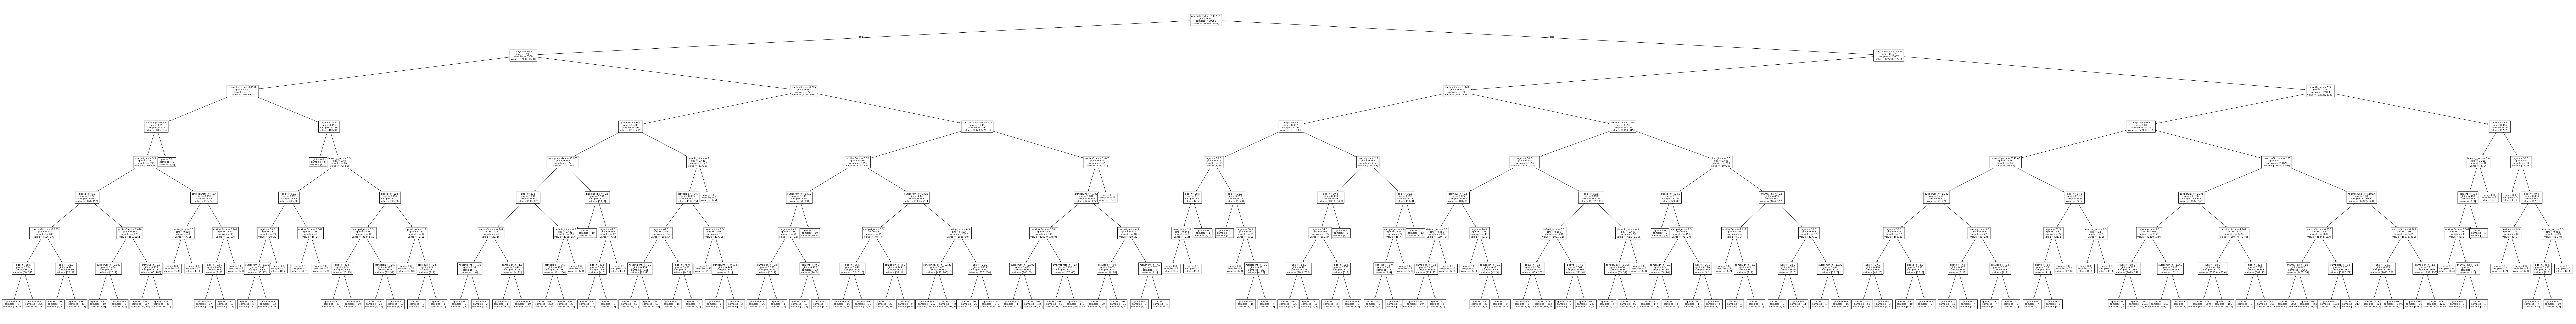

In [263]:
clf = best_clf
fig_clf, ax_clf = plt.subplots(figsize=(160,20))
tree.plot_tree(clf, fontsize=8, feature_names = X.columns)
plt.show()

In [75]:
#Skip
import matplotlib.pyplot as plt
import itertools

In [117]:
#Skip
ys = campaign['y'].value_counts()
ys.head()

y
no     32861
yes     4208
Name: count, dtype: int64

In [265]:
subs = campaign[['age', 'job_int', 'marital_int', 'education_int', 'default_int', 'housing_int', 'loan_int', 'contact_int',
            'month_int', 'campaign', 'pdays','previous','poutcome_int', 'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx','euribor3m','nr.employed']]
subs = subs.drop(useless, axis = 1)
subs.describe()

,age,marital_int,default_int,housing_int,loan_int,month_int,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.00000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.025493,1.173029,0.208557,1.074806,0.325447,4.23146,2.564407,962.221803,0.173730,0.081526,93.576551,-40.494829,3.621945,5167.010650
std,10.435288,0.608166,0.406482,0.985045,0.721717,2.31931,2.764084,187.531477,0.496159,1.572287,0.579339,4.628895,1.734496,72.294476
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,0.000000,0.000000,0.000000,3.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,1.000000,0.000000,2.000000,0.000000,4.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,2.000000,0.000000,2.000000,0.000000,6.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,3.000000,2.000000,2.000000,2.000000,9.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


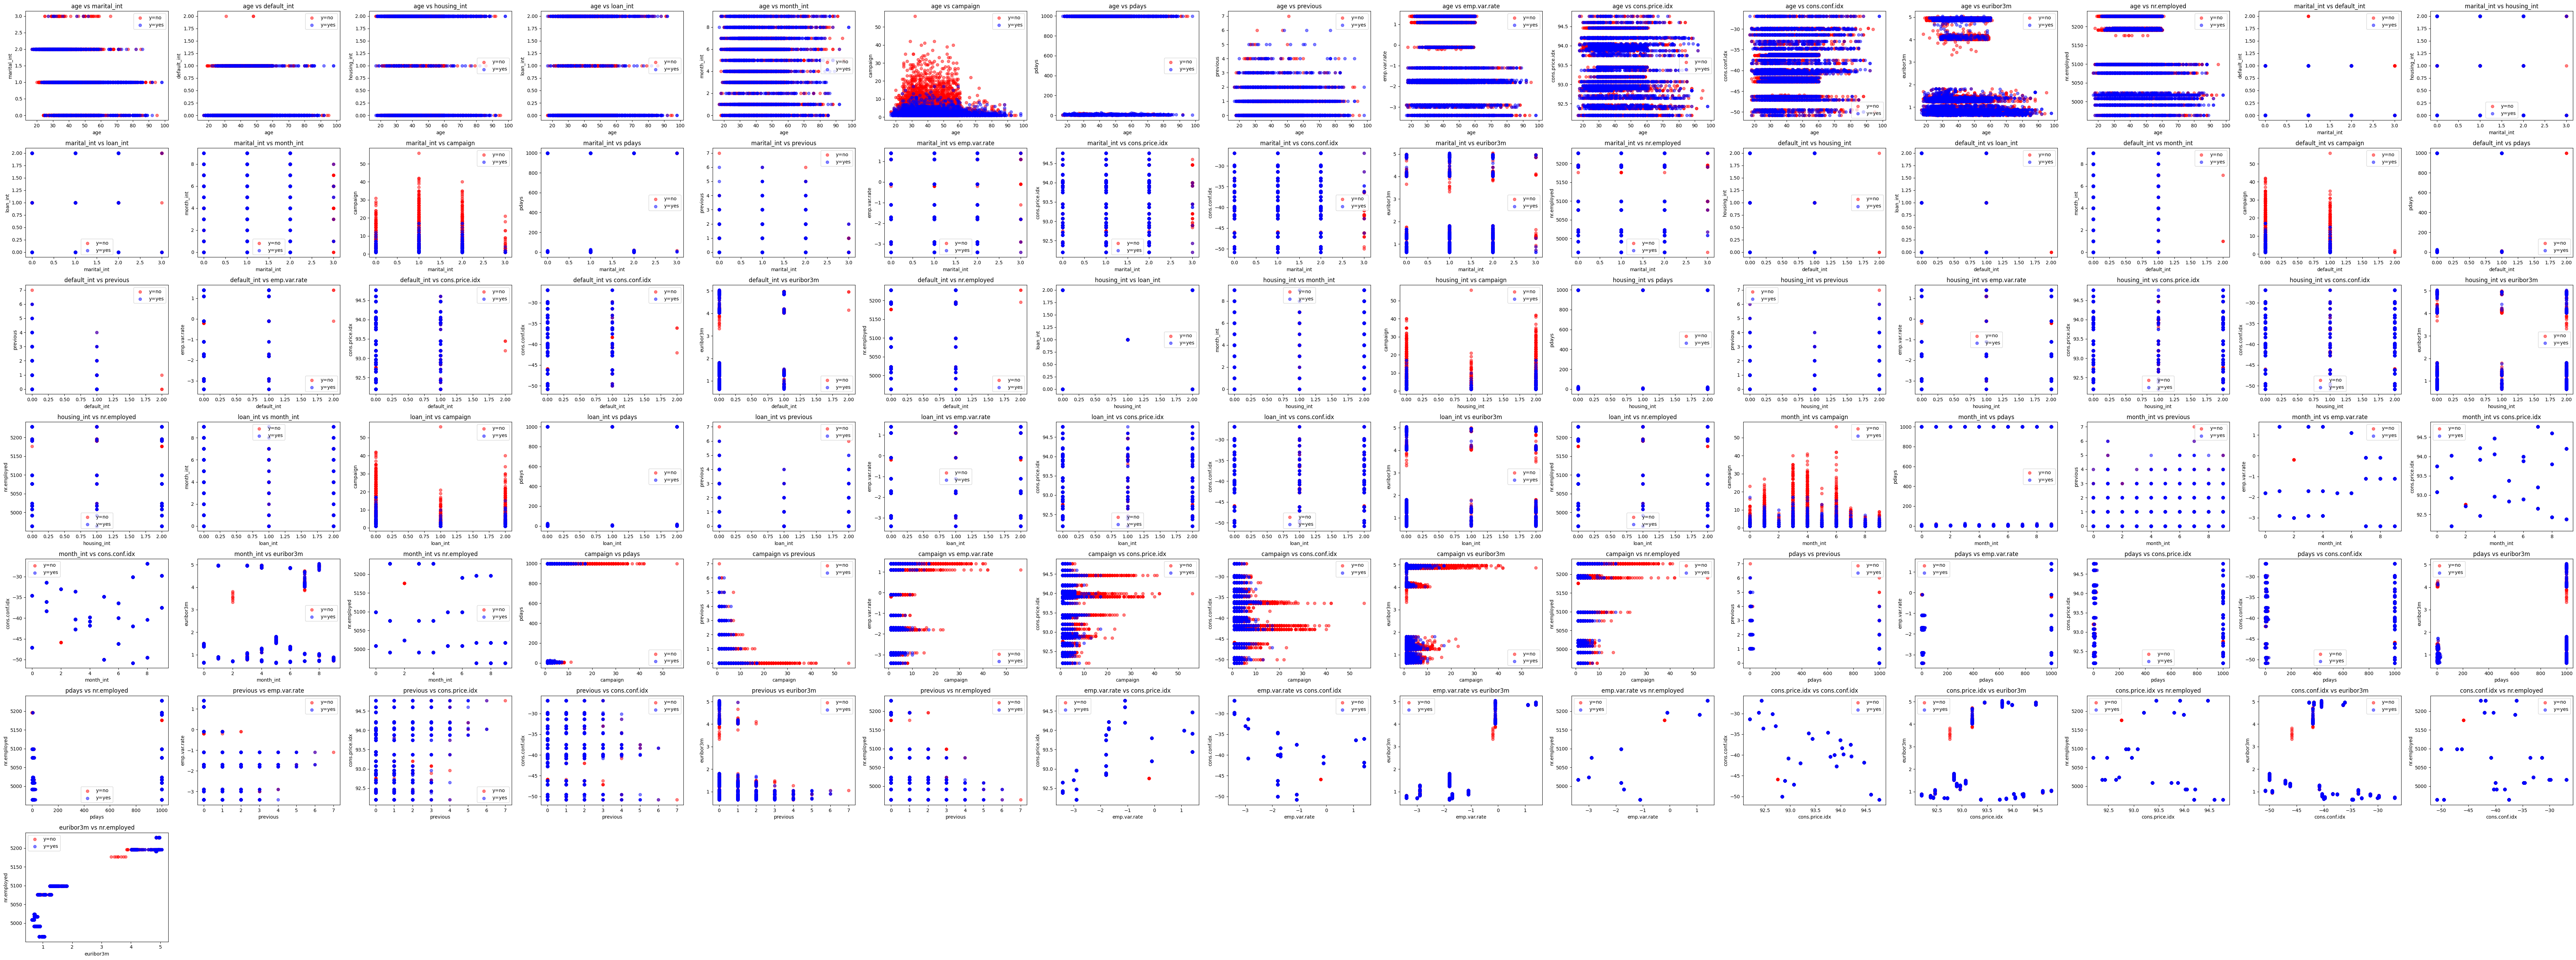

In [266]:

color_col = campaign['y']
columns = subs.columns
pairs = list(itertools.combinations(columns, 2))

# color based on the y output
my_colors = {'no': 'red', 'yes': 'blue'}

cols = 15
rows = (len(pairs) + cols - 1) // cols
work_percentage = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols,4 * rows))
axes = axes.flatten()

for i, (col1, col2) in enumerate(pairs):
    ax = axes[i]
    for y_value, color in my_colors.items():
        filtered = campaign.query("y == @y_value")
        ax.scatter(filtered[col1], filtered[col2],
            alpha = 0.5, label = f'y={y_value}', color = color)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(f'{col1} vs {col2}')
    ax.legend()

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

0.9007283517669274
0.8295117345562449


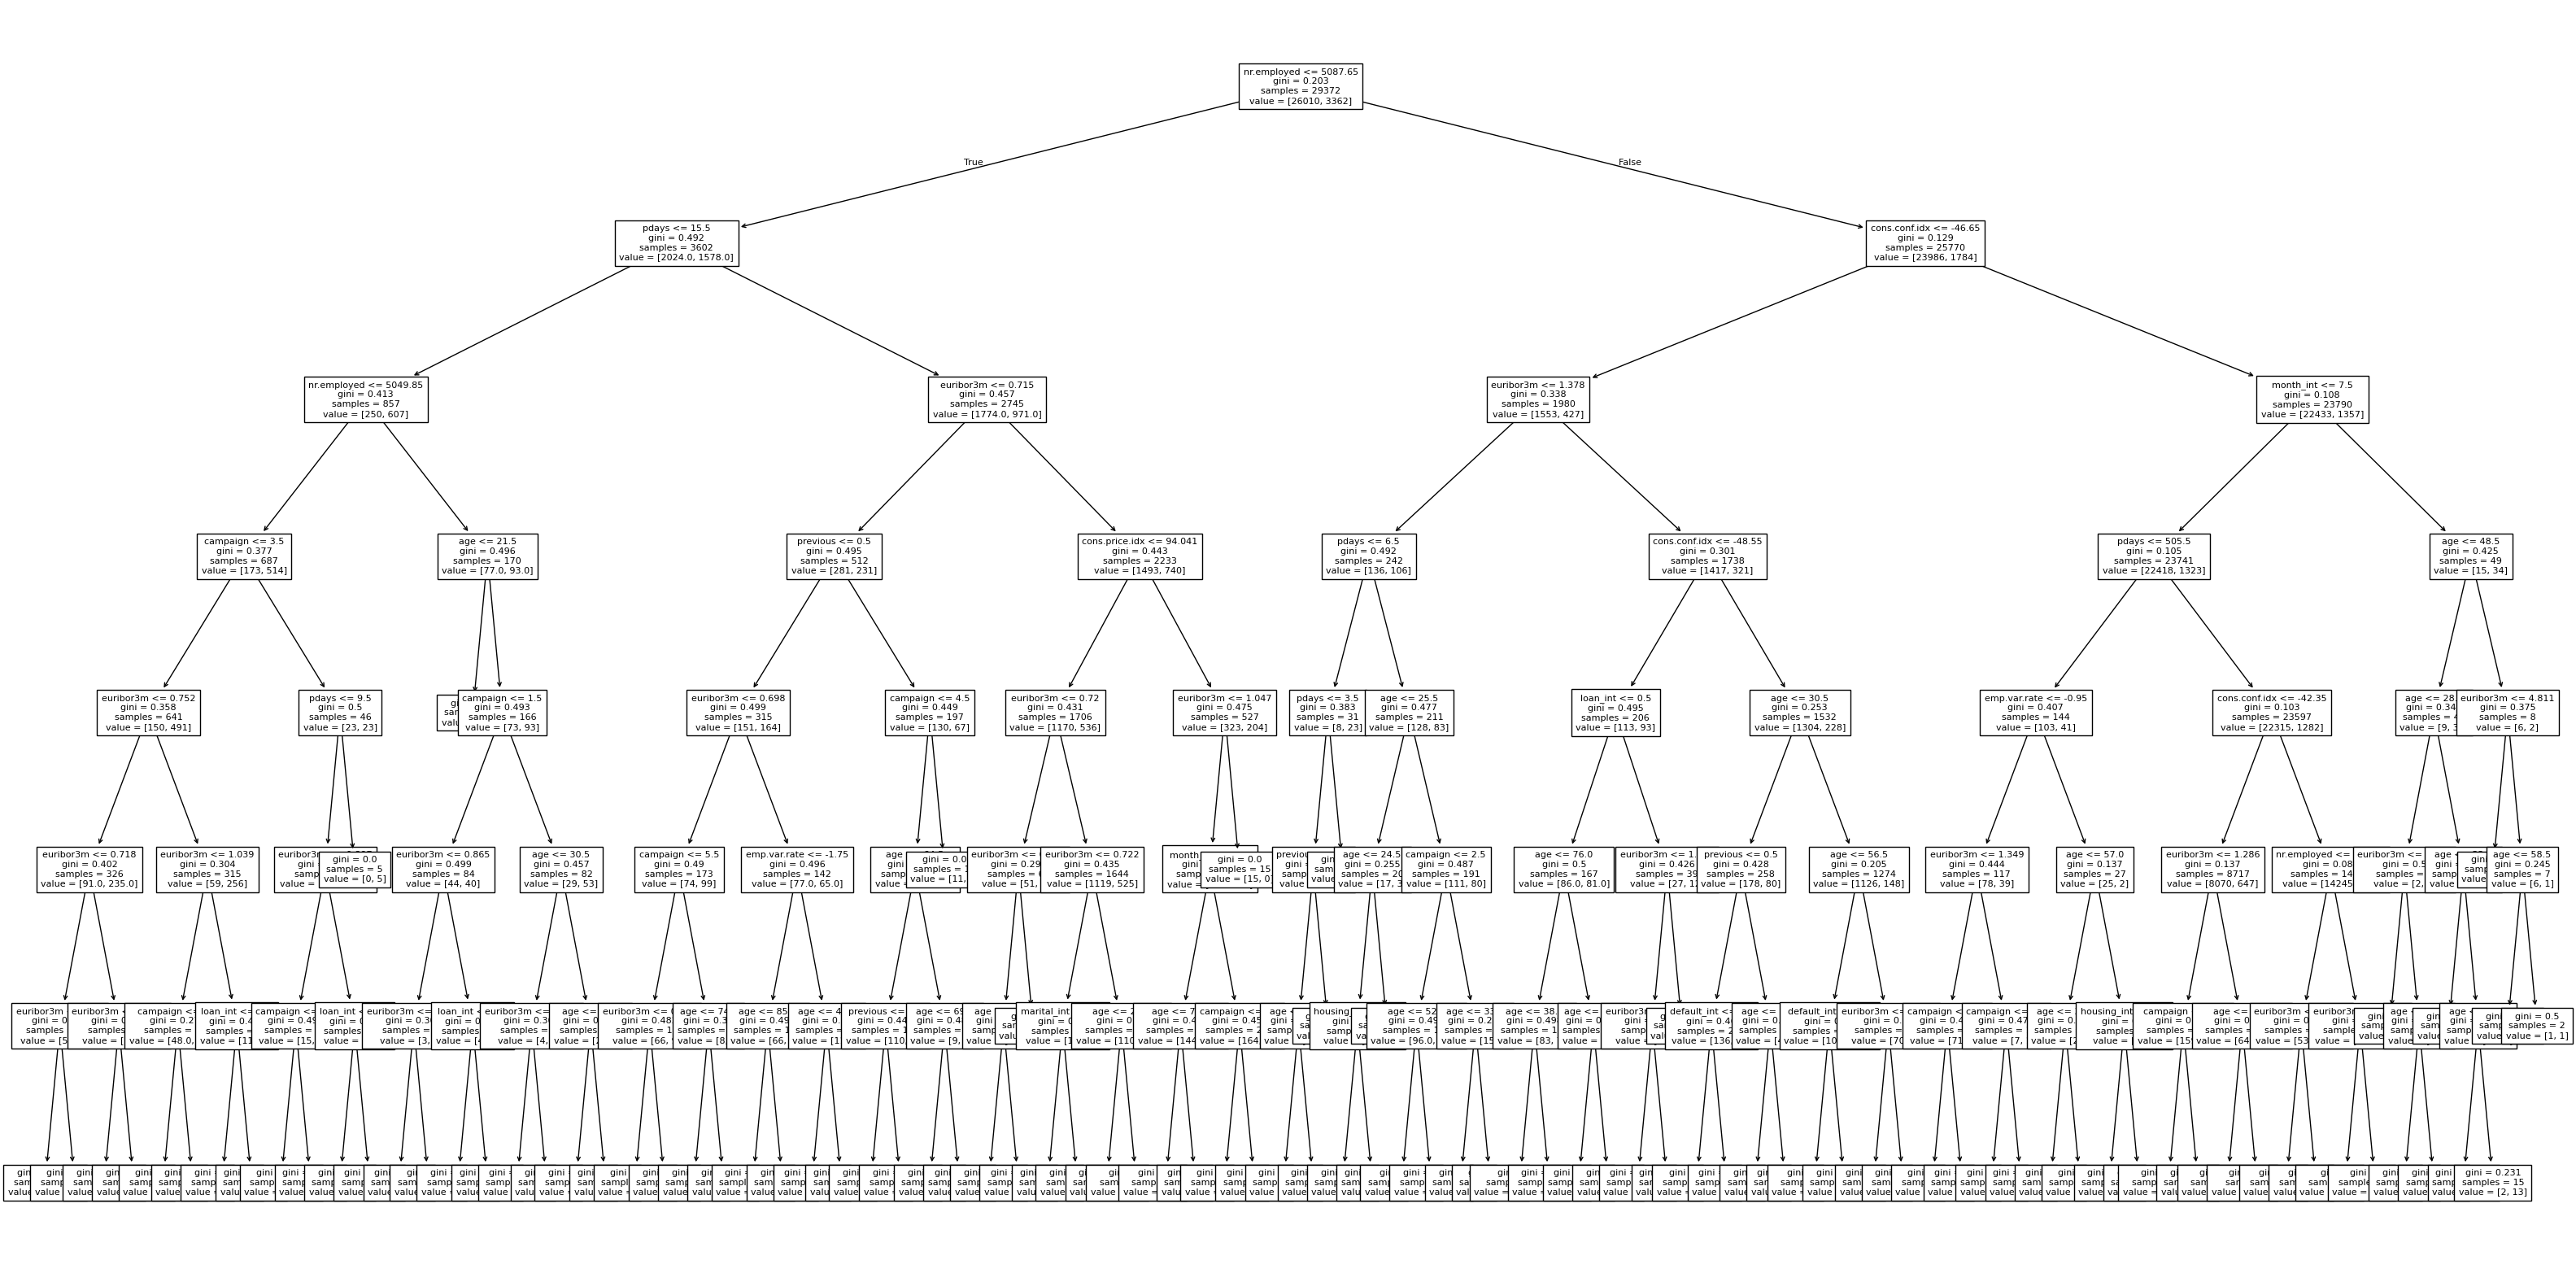

In [289]:
cut = 20
left_indices = X_train['campaign'] < 15
right_indices = X_train['campaign'] >= 15

left_tree = DecisionTreeClassifier(max_depth = 7)
left_tree.fit(X_train[left_indices], y_train[left_indices])

right_tree = DecisionTreeClassifier(max_depth = 7)
right_tree.fit(X_train[right_indices], y_train[right_indices])


print(left_tree.score(X_test, y_test))
print(right_tree.score(X_test, y_test))

fig_clf, ax_clf = plt.subplots(figsize=(40,20))
tree.plot_tree(left_tree, fontsize=8, feature_names = X.columns)
plt.show()

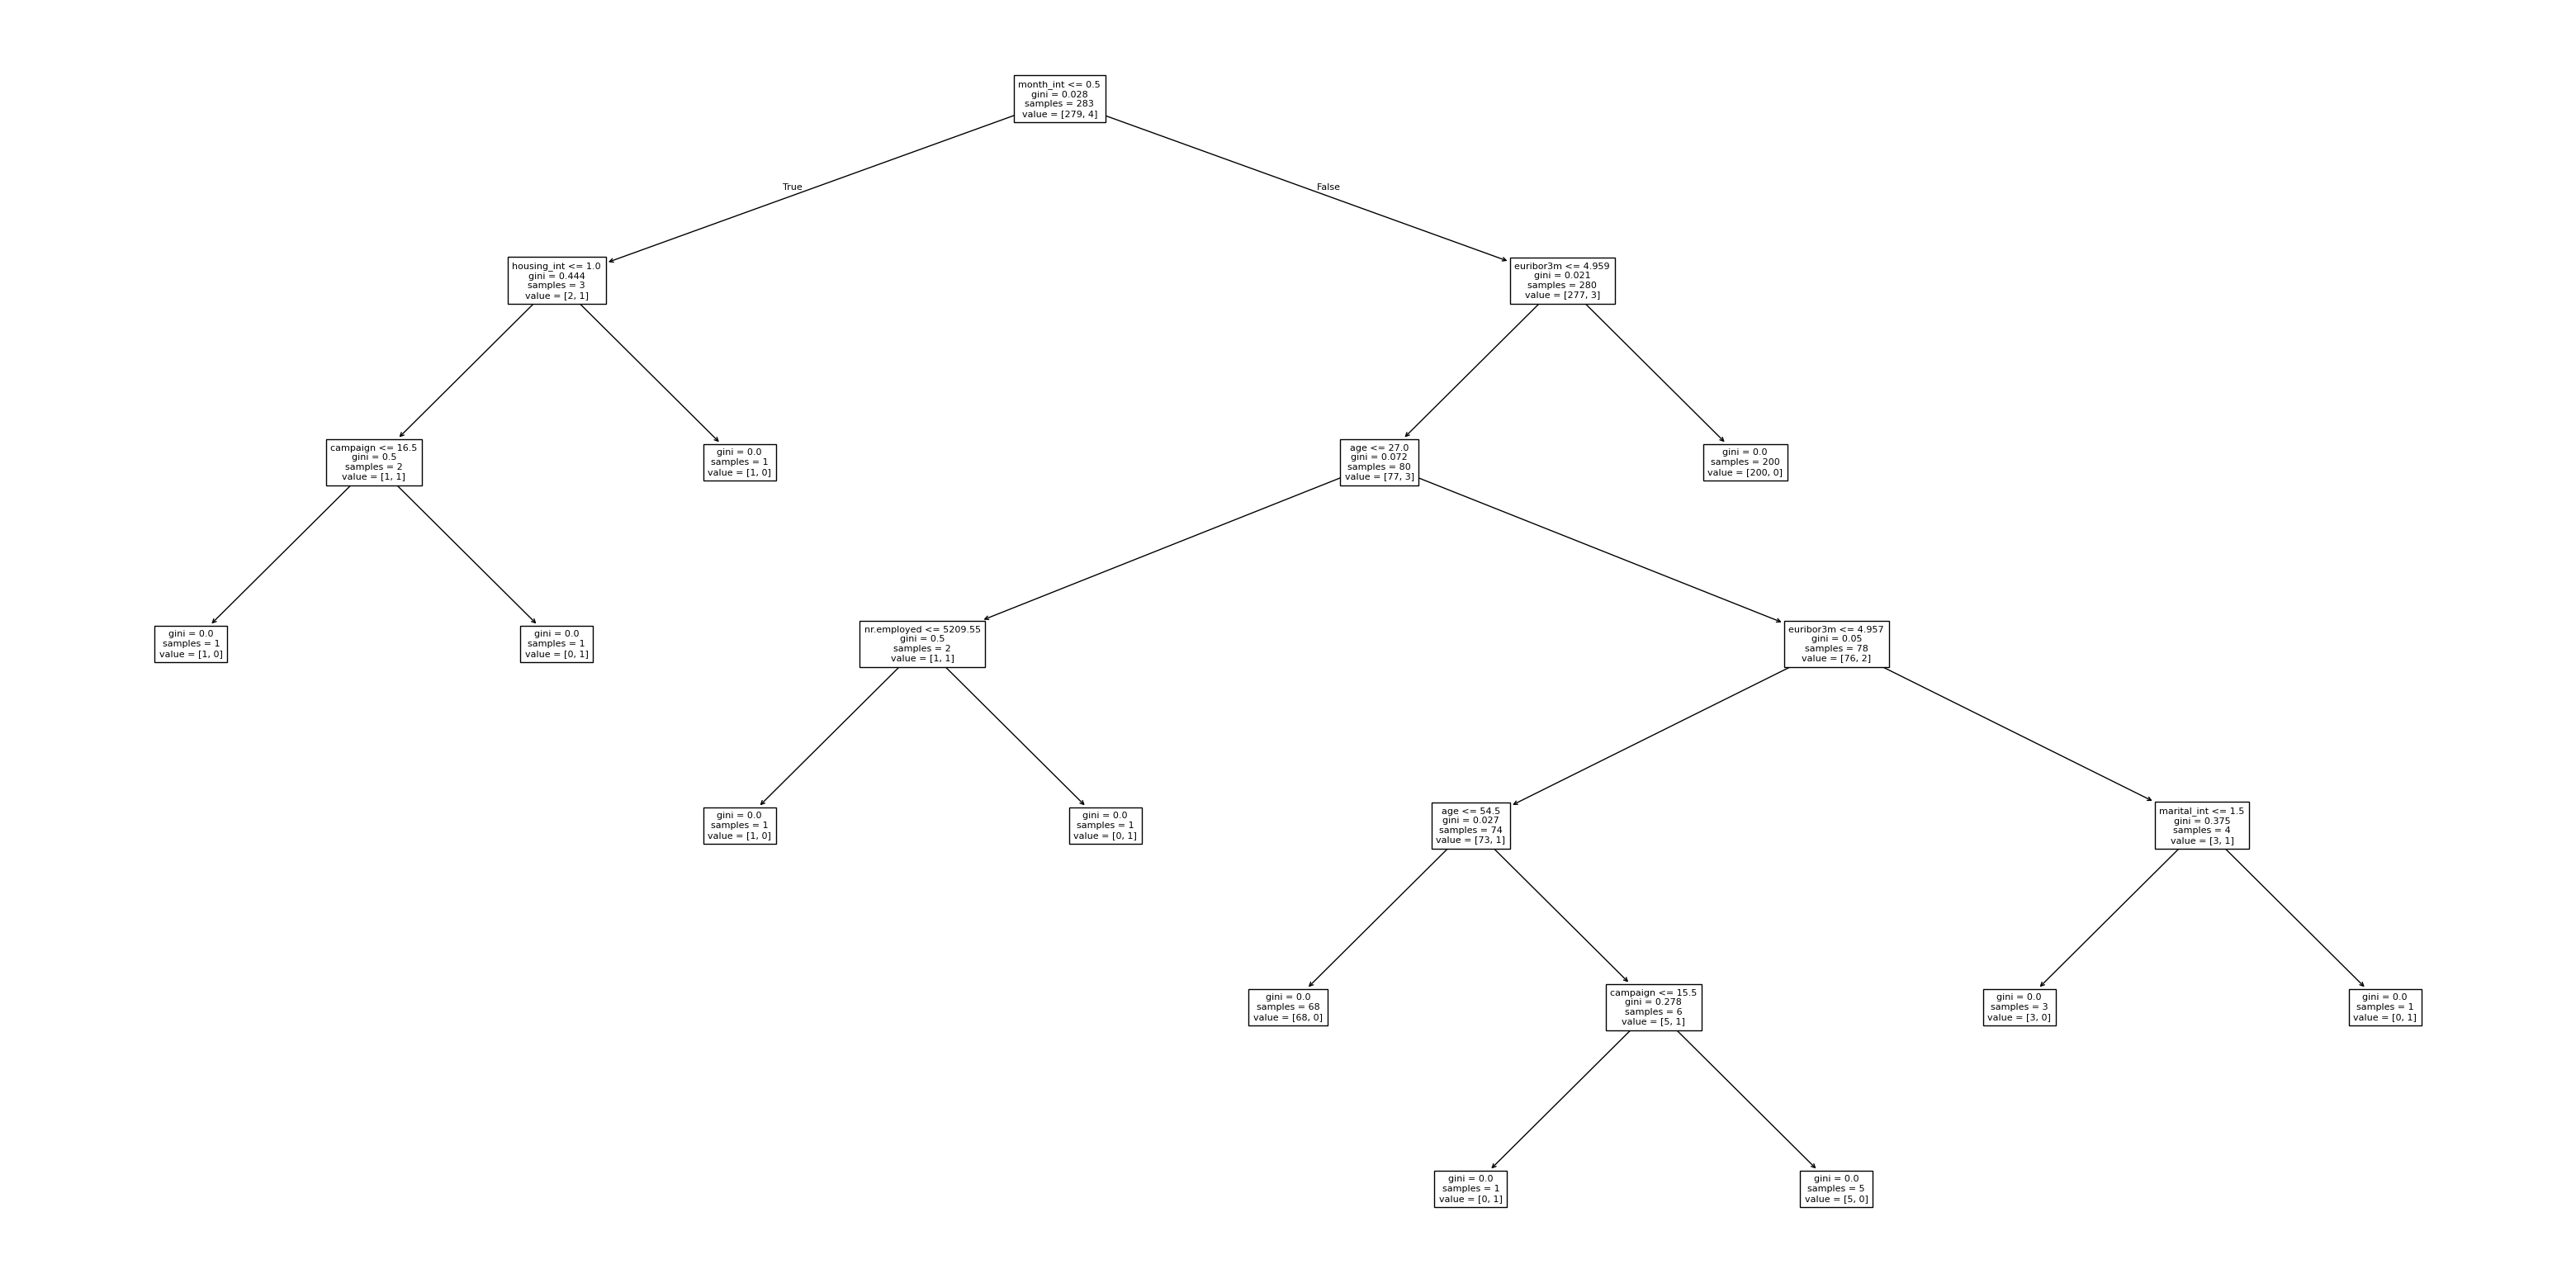

In [286]:
fig_2, ax_2 = plt.subplots(figsize=(40,20))
tree.plot_tree(right_tree, fontsize=8, feature_names = X.columns)
plt.show()